In [1]:
from google.colab import files
uploaded = files.upload()

Saving customer_dataset.csv to customer_dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv('customer_dataset.csv')
df.head()

,cliente_id,genero,edad,pais,ciudad,segmento_de_cliente,meses_permanencia,canal_de_registro,tipo_contrato,conecciones_mensuales,...,tiempo_promedio_de_resolucion,tipo_de_queja,puntuacion_csates,escaladas,tasa_apertura_email,tasa_clics_marketing,puntuacion_nps,respuesta_de_la_encuesta,recuento_de_referencias,abandonar
0,CUST_00001,Masculino,68,Banglades,Londres,SME,22,Web,Mensual,26,...,13.354360,Servicio,4.0,0,0.71,0.40,27,Satisfecho,1,0
1,CUST_00002,Femenino,57,Canada,Sydney,Individual,9,Mobile,Mensual,7,...,25.140088,Facturacion,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Masculino,24,Alemania,New York,SME,58,Web,Anual,19,...,27.572928,Servicio,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Masculino,49,Australia,Dhaka,Individual,19,Mobile,Anual,34,...,26.420822,Tecnico,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Masculino,65,Banglades,Delhi,Individual,52,Web,Mensual,20,...,26.674579,Tecnico,4.0,0,0.65,0.44,21,Insatisfecho,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_id                     10000 non-null  object 
 1   genero                         10000 non-null  object 
 2   edad                           10000 non-null  int64  
 3   pais                           10000 non-null  object 
 4   ciudad                         10000 non-null  object 
 5   segmento_de_cliente            10000 non-null  object 
 6   meses_permanencia              10000 non-null  int64  
 7   canal_de_registro              10000 non-null  object 
 8   tipo_contrato                  10000 non-null  object 
 9   conecciones_mensuales          10000 non-null  int64  
 10  dias_activos_semanales         10000 non-null  int64  
 11  promedio_coneccion             10000 non-null  float64
 12  caracteristicas_usadas         10000 non-null  

1. Descripción general del dataset

El conjunto de datos contiene 10.000 registros de clientes y 32 variables, relacionadas con información demográfica, comportamiento de uso del servicio, interacciones con soporte y factores comerciales.
La variable objetivo es “abandonar”, que indica si el cliente canceló el servicio (1) o permaneció activo (0).

2. Tipos de datos

El dataset incluye:
14 variables numéricas enteras (ej. edad, meses_permanencia, tickets de soporte, etc.).

6 variables numéricas continuas (ej. tasa de crecimiento de uso, puntaje de satisfacción, tasa de clics).

12 variables categóricas (ej. género, país, tipo de contrato, método de pago, etc.).

3. Valores faltantes

Solo una variable presenta valores faltantes:

tipo_de_queja: 20.45 % de datos faltantes (≈ 2.045 registros)

El resto de las variables están completas. Será necesario decidir si se imputan estos valores, se agrupan en una categoría (“sin queja”) o se excluyen en ciertos análisis.

4. Relevancia de las variables

El dataset contiene variables potencialmente influyentes sobre el churn, tales como:

relación con el servicio: meses permanencia, conexiones, uso de características

precio y pagos: cuota mensual, errores de pago, descuentos

experiencia del cliente: tickets de soporte, tiempo de resolución, NPS, satisfacción

marketing y engagement: tasa de apertura de email, clics


In [21]:
df.describe()

,edad,meses_permanencia,conecciones_mensuales,dias_activos_semanales,promedio_coneccion,caracteristicas_usadas,tasa_crecimiento_uso,ultima_coneccion,cuota_mensual,ingresos_totales,errores_de_pago,tickets_de_soporte,tiempo_promedio_de_resolucion,puntuacion_csates,escaladas,tasa_apertura_email,tasa_clics_marketing,puntuacion_nps,recuento_de_referencias,abandonar
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,45.906100,30.155700,19.672000,3.479400,15.187890,4.990800,0.019423,9.505200,34.930000,1057.018000,0.501000,1.206600,23.953210,3.486700,0.294100,0.499610,0.253575,19.110500,0.9922,0.102100
std,16.420416,17.099517,9.838003,2.302283,6.830774,2.211607,0.149567,9.799417,23.785115,1020.148233,0.711934,1.104554,9.956999,0.978631,0.543171,0.231601,0.140532,38.936619,0.9939,0.302795
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.580000,0.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.010000,-100.000000,0.0000,0.000000
25%,32.000000,16.000000,13.000000,1.000000,10.391645,3.000000,-0.080000,2.000000,20.000000,340.000000,0.000000,0.000000,17.082041,3.000000,0.000000,0.300000,0.130000,-7.000000,0.0000,0.000000
50%,46.000000,30.000000,20.000000,3.000000,15.161659,5.000000,0.020000,6.000000,30.000000,720.000000,0.000000,1.000000,23.950444,4.000000,0.000000,0.500000,0.250000,19.000000,1.0000,0.000000
75%,60.000000,45.000000,26.000000,5.000000,19.882034,6.000000,0.120000,13.000000,50.000000,1440.000000,1.000000,2.000000,30.758480,4.000000,1.000000,0.700000,0.380000,46.000000,2.0000,0.000000
max,74.000000,59.000000,54.000000,7.000000,41.996411,15.000000,0.540000,80.000000,100.000000,5900.000000,5.000000,7.000000,61.821878,5.000000,4.000000,0.900000,0.500000,100.000000,7.0000,1.000000


Panorama General del Dataset
Total de registros: 10,000 clientes

Tasa de abandono promedio: 10.21% (1,021 clientes con riesgo de cancelación)

Completitud de datos: 100% en variables numéricas (sin valores nulos)

Perfil Demográfico del Cliente
Edad promedio: 46 años

Rango de edad: 18 a 74 años (clientes jóvenes a adultos mayores)

Antigüedad promedio: 30.2 meses (≈ 2.5 años)

Cliente más antiguo: 59 meses (≈ 5 años)

Cliente más nuevo: 1 mes

Comportamiento de Uso del Servicio
Conexiones mensuales: 19.7 conexiones promedio

Días activos semanales: 3.5 días de actividad/semana

Duración promedio por conexión: 15.2 minutos



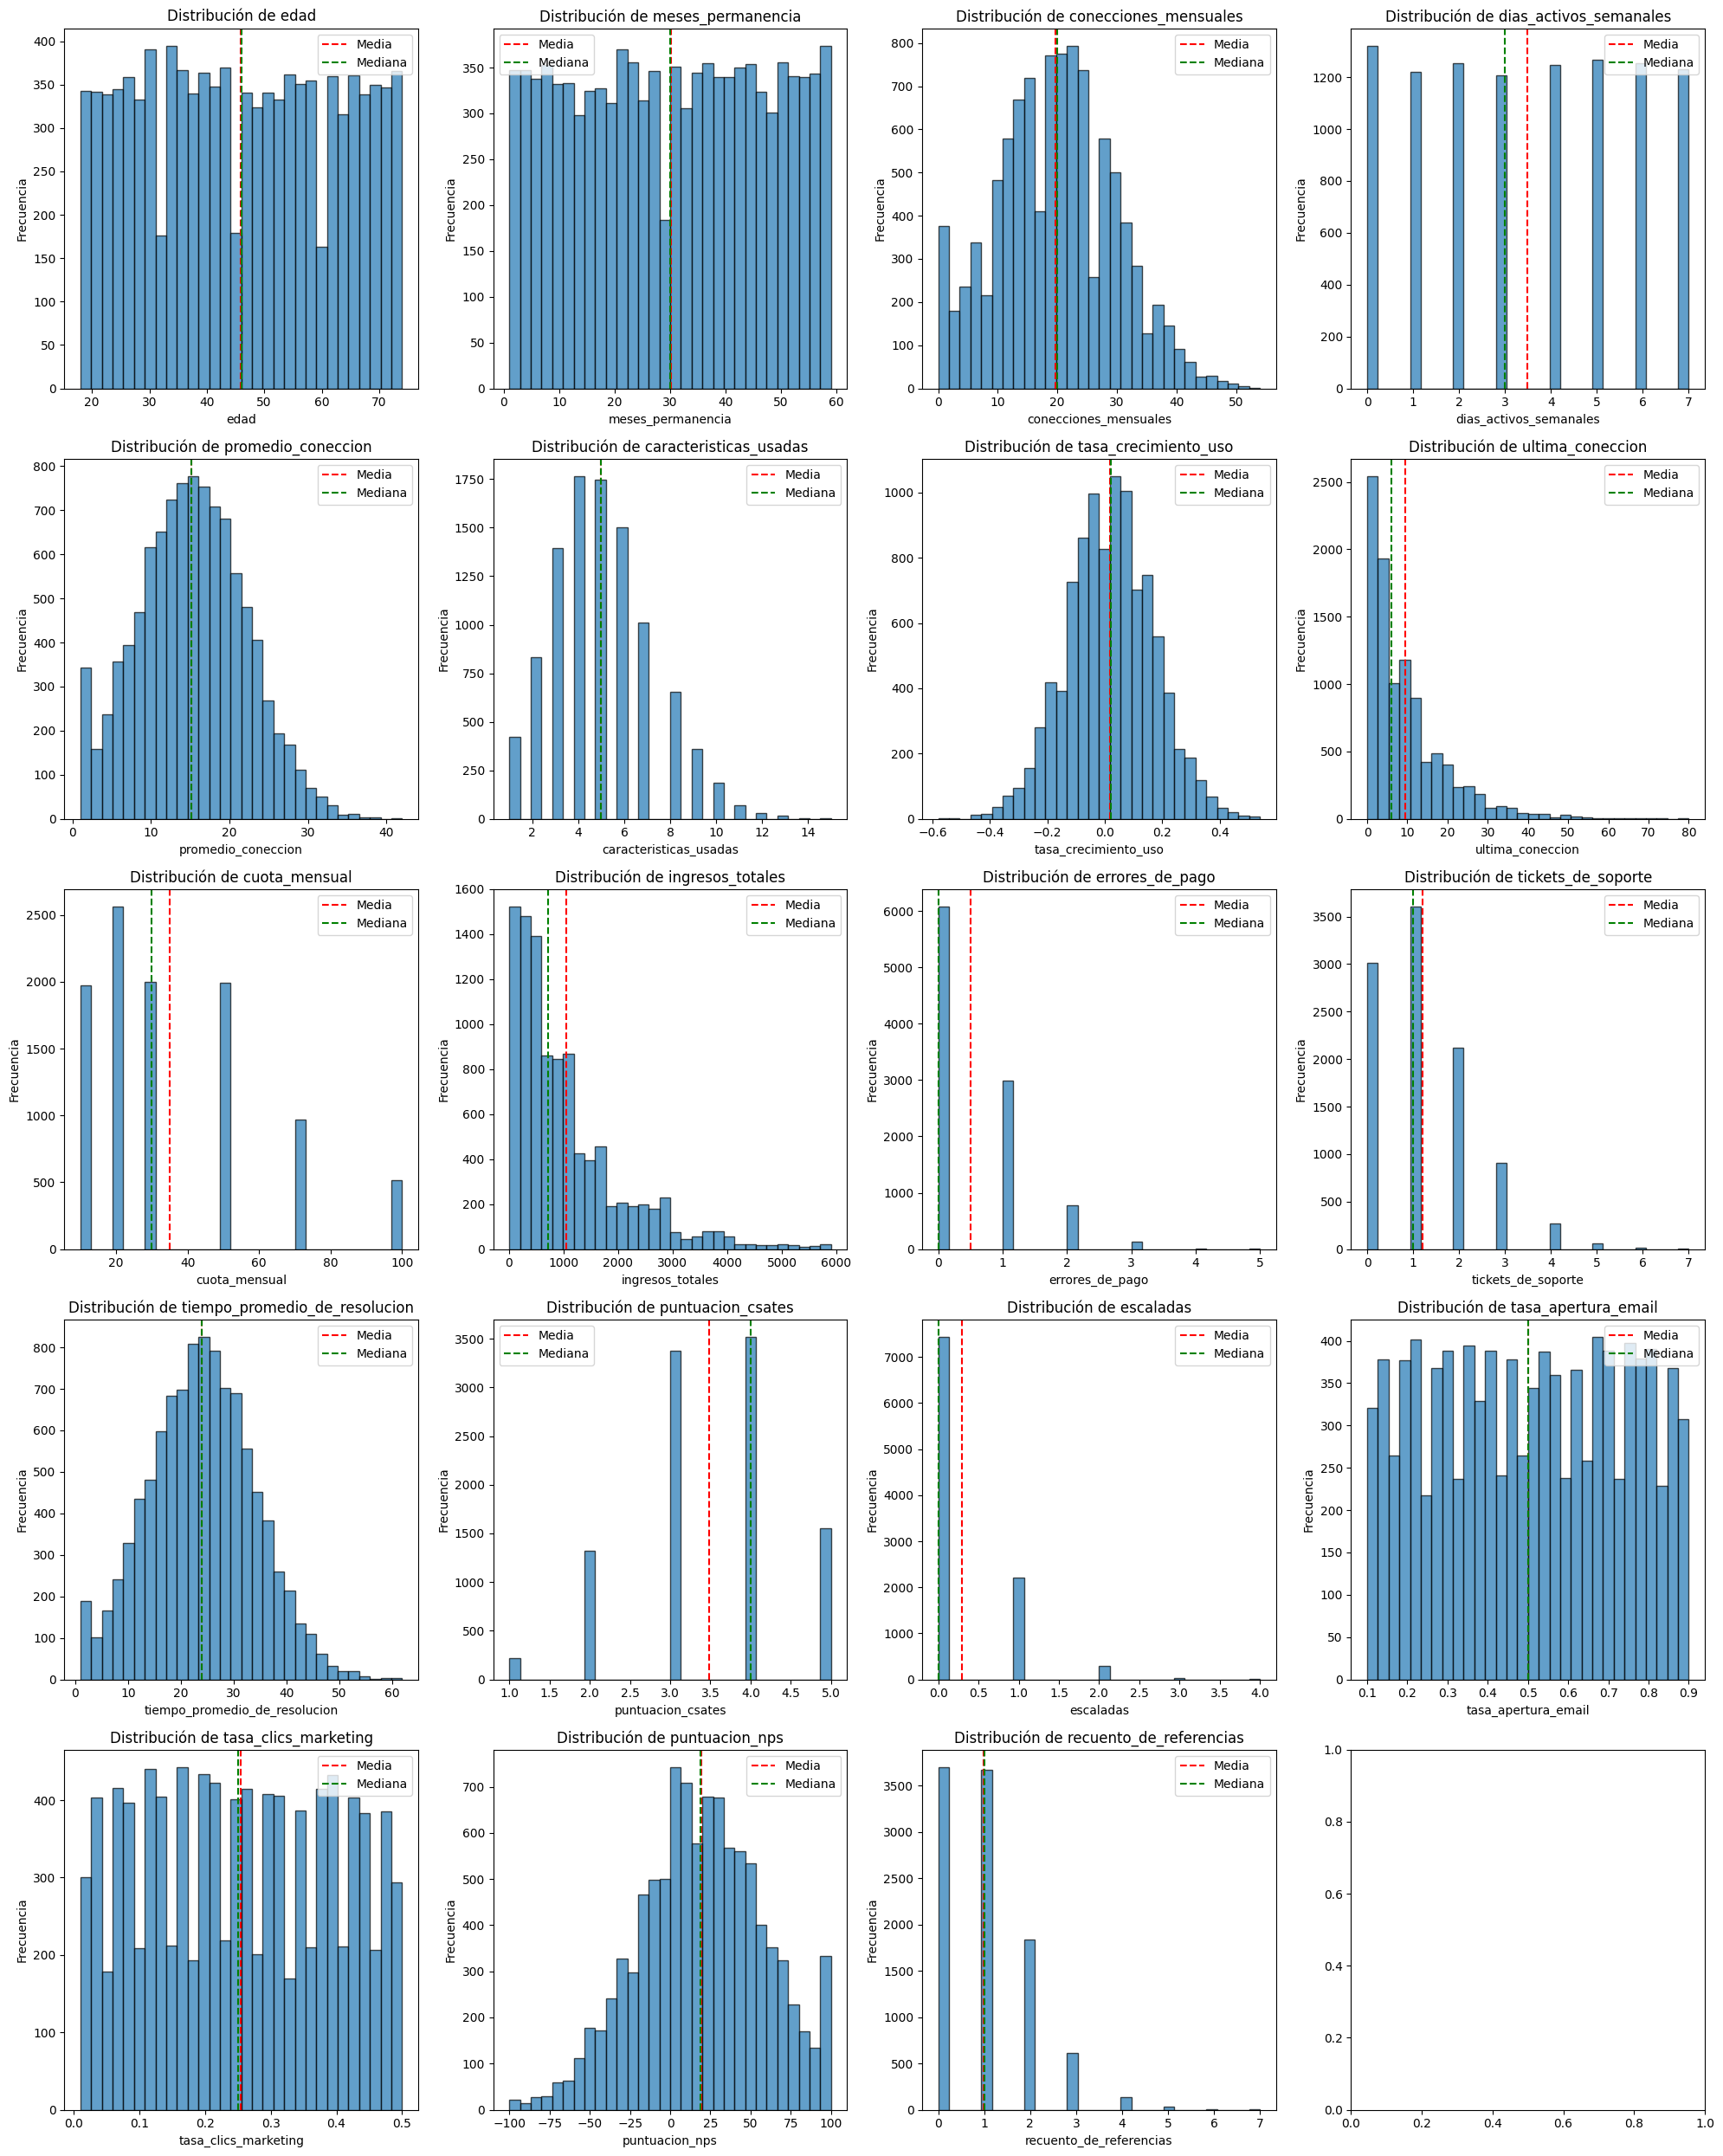

In [25]:
# Histogramas para todas las variables numéricas
num_vars = ['edad', 'meses_permanencia', 'conecciones_mensuales',
            'dias_activos_semanales', 'promedio_coneccion',
            'caracteristicas_usadas', 'tasa_crecimiento_uso',
            'ultima_coneccion', 'cuota_mensual', 'ingresos_totales',
            'errores_de_pago', 'tickets_de_soporte',
            'tiempo_promedio_de_resolucion', 'puntuacion_csates',
            'escaladas', 'tasa_apertura_email', 'tasa_clics_marketing',
            'puntuacion_nps', 'recuento_de_referencias']

fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    axes[i].hist(df[var], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df[var].median(), color='green', linestyle='--', label='Mediana')
    axes[i].legend()

plt.tight_layout()
plt.show()

Edad

 La distribución es bastante uniforme (clientes en casi todas las edades).
 Conclusión: la edad no parece concentrarse en un grupo específico, así que por sí sola puede no predecir churn — habrá que cruzarla con “abandonar”.

 Meses de permanencia

 Bastante repartida pero con más clientes entre 20–50 meses.
 Conclusión: clientes con más tiempo podrían estar más “estables”… o podrían irse cuando terminan ciclos — se analizará cruzando con churn.

 Conexiones mensuales

Forma como campana (normal).
Conclusión: comportamiento típico.
Clientes con valores muy bajos podrían indicar desuso → riesgo de churn.

Días activos semanales

Muy concentrado en números bajos (1–3 días).
Conclusión: muchos clientes usan poco la plataforma.
Eso suele asociarse a abandono.

 Promedio de conexión

 Distribución clara tipo campana.
 Conclusión: normal, pero los extremos (muy baja conexión) serían sospechosos.

Características usadas

Muy pocos clientes usan muchas funcionalidades.
Conclusión: bajo engagement frecuente → indicador clásico de churn.

Tasa de crecimiento de uso

Centrada cerca de 0 (uso estable).
Clientes con tasa negativa: bajan su uso → riesgo de abandono.

 Última conexión

 Muy sesgada: muchos llevan mucho tiempo sin conectarse.
Conclusión clave: quienes llevan meses sin entrar ≈ muy probable churn.

Cuota mensual

Valores concentrados en 20–40 (algunos muy caros).
 Planes caros pueden tener más abandono — luego se analiza cruzado.

  Ingresos totales

Muy sesgada (pocos clientes generan mucho).
Churn en este grupo es más costoso, vale estudiarlo aparte.

Errores de pago

 La mayoría nunca falla — pero cuando falla, falla varias veces.
Errores repetidos suelen empujar a churn.

Tickets de soporte

 Muchos nunca escriben, algunos escriben mucho.
 Dos lecturas:

pocos tickets = clientes felices … o inactivos

muchos tickets = frustración → riesgo churn

 Tiempo promedio de resolución

 Distribución normal.

 Tiempos altos probablemente incrementan abandono.

 Satisfacción (csat)

Bastante centrada pero con colas.
Churn casi siempre crece en puntajes bajos.

 Escaladas

 La mayoría no escala, unos pocos sí.
 Escalaciones suelen correlacionar fuerte con churn.

 Tasa apertura email

 Bastante distribuida.
Clientes que no abren correos ≈ desconectados → posible churn.

En conclución las señales claras de riesgo son: señales claras de riesgo:

baja actividad

baja satisfacción

tickets y escaladas

tiempo sin conectarse

posibles problemas de pago

baja adopción de funcionalidades

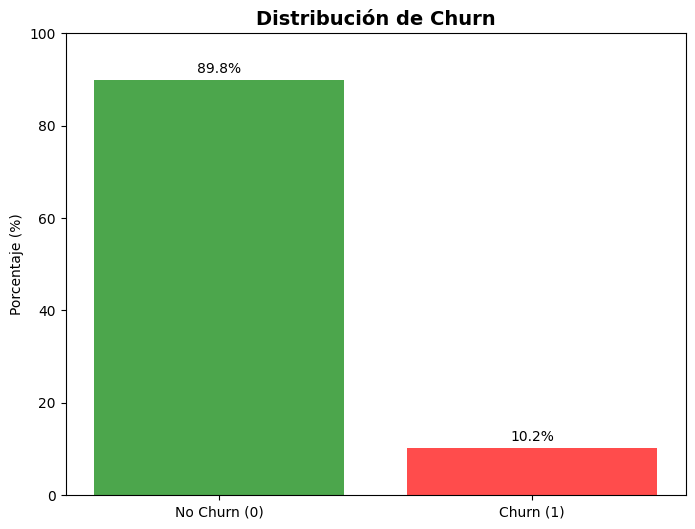

Tasa de churn: 10.21%
Cantidad de churns: 1,021 de 10,000 clientes


In [26]:
# Distribución de churn
churn_dist = df['abandonar'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(['No Churn (0)', 'Churn (1)'], churn_dist.values,
               color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Churn', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Agregar etiquetas con porcentajes
for bar, percentage in zip(bars, churn_dist.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

print(f"Tasa de churn: {churn_dist[1]:.2f}%")
print(f"Cantidad de churns: {df['abandonar'].sum():,} de {len(df):,} clientes")

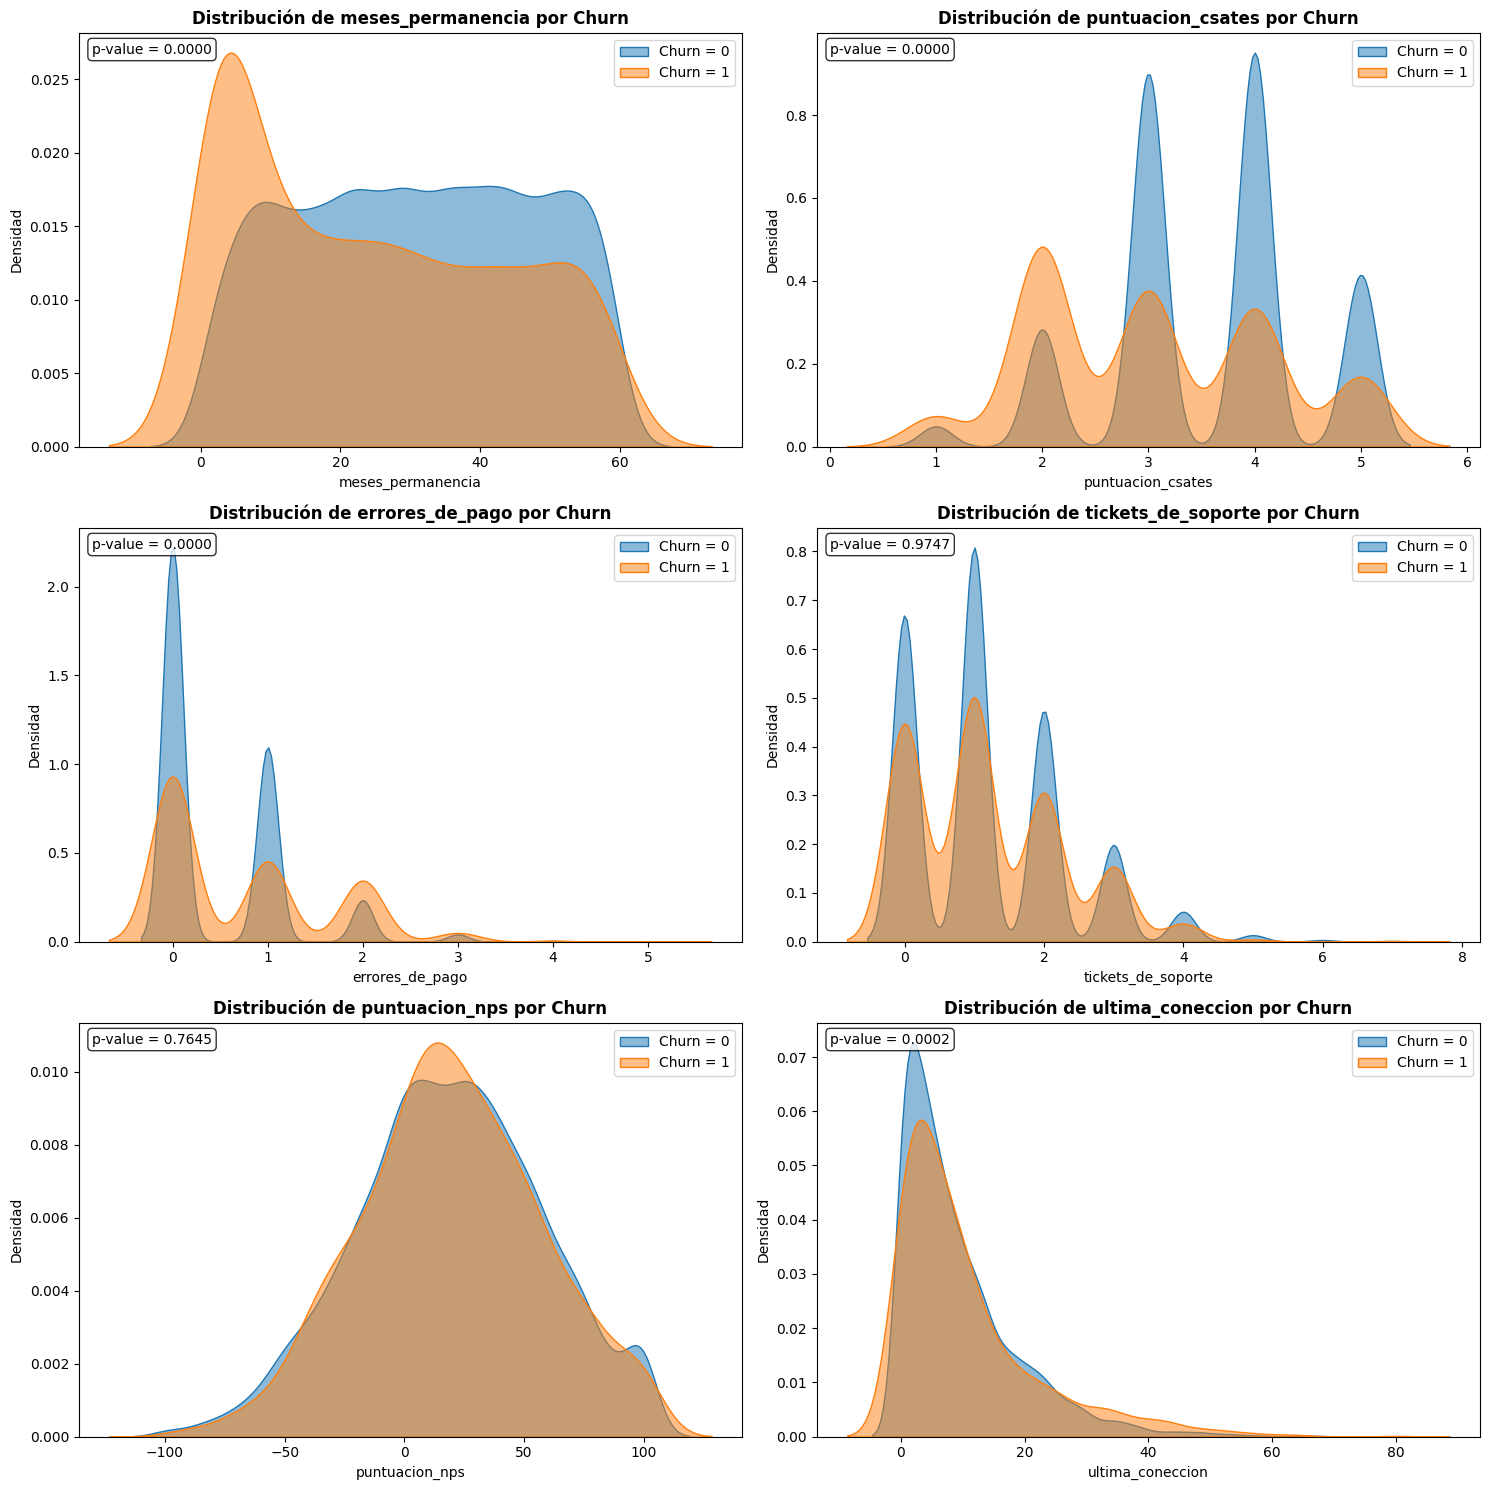

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    for churn_val in [0, 1]:
        subset = df[df['abandonar'] == churn_val][var]
        sns.kdeplot(subset, label=f'Churn = {churn_val}',
                   ax=axes[i], fill=True, alpha=0.5)

    axes[i].set_title(f'Distribución de {var} por Churn', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

    # Test estadístico
    churn_0 = df[df['abandonar'] == 0][var]
    churn_1 = df[df['abandonar'] == 1][var]
    t_stat, p_value = stats.ttest_ind(churn_0, churn_1)
    axes[i].text(0.02, 0.95, f'p-value = {p_value:.4f}',
                transform=axes[i].transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

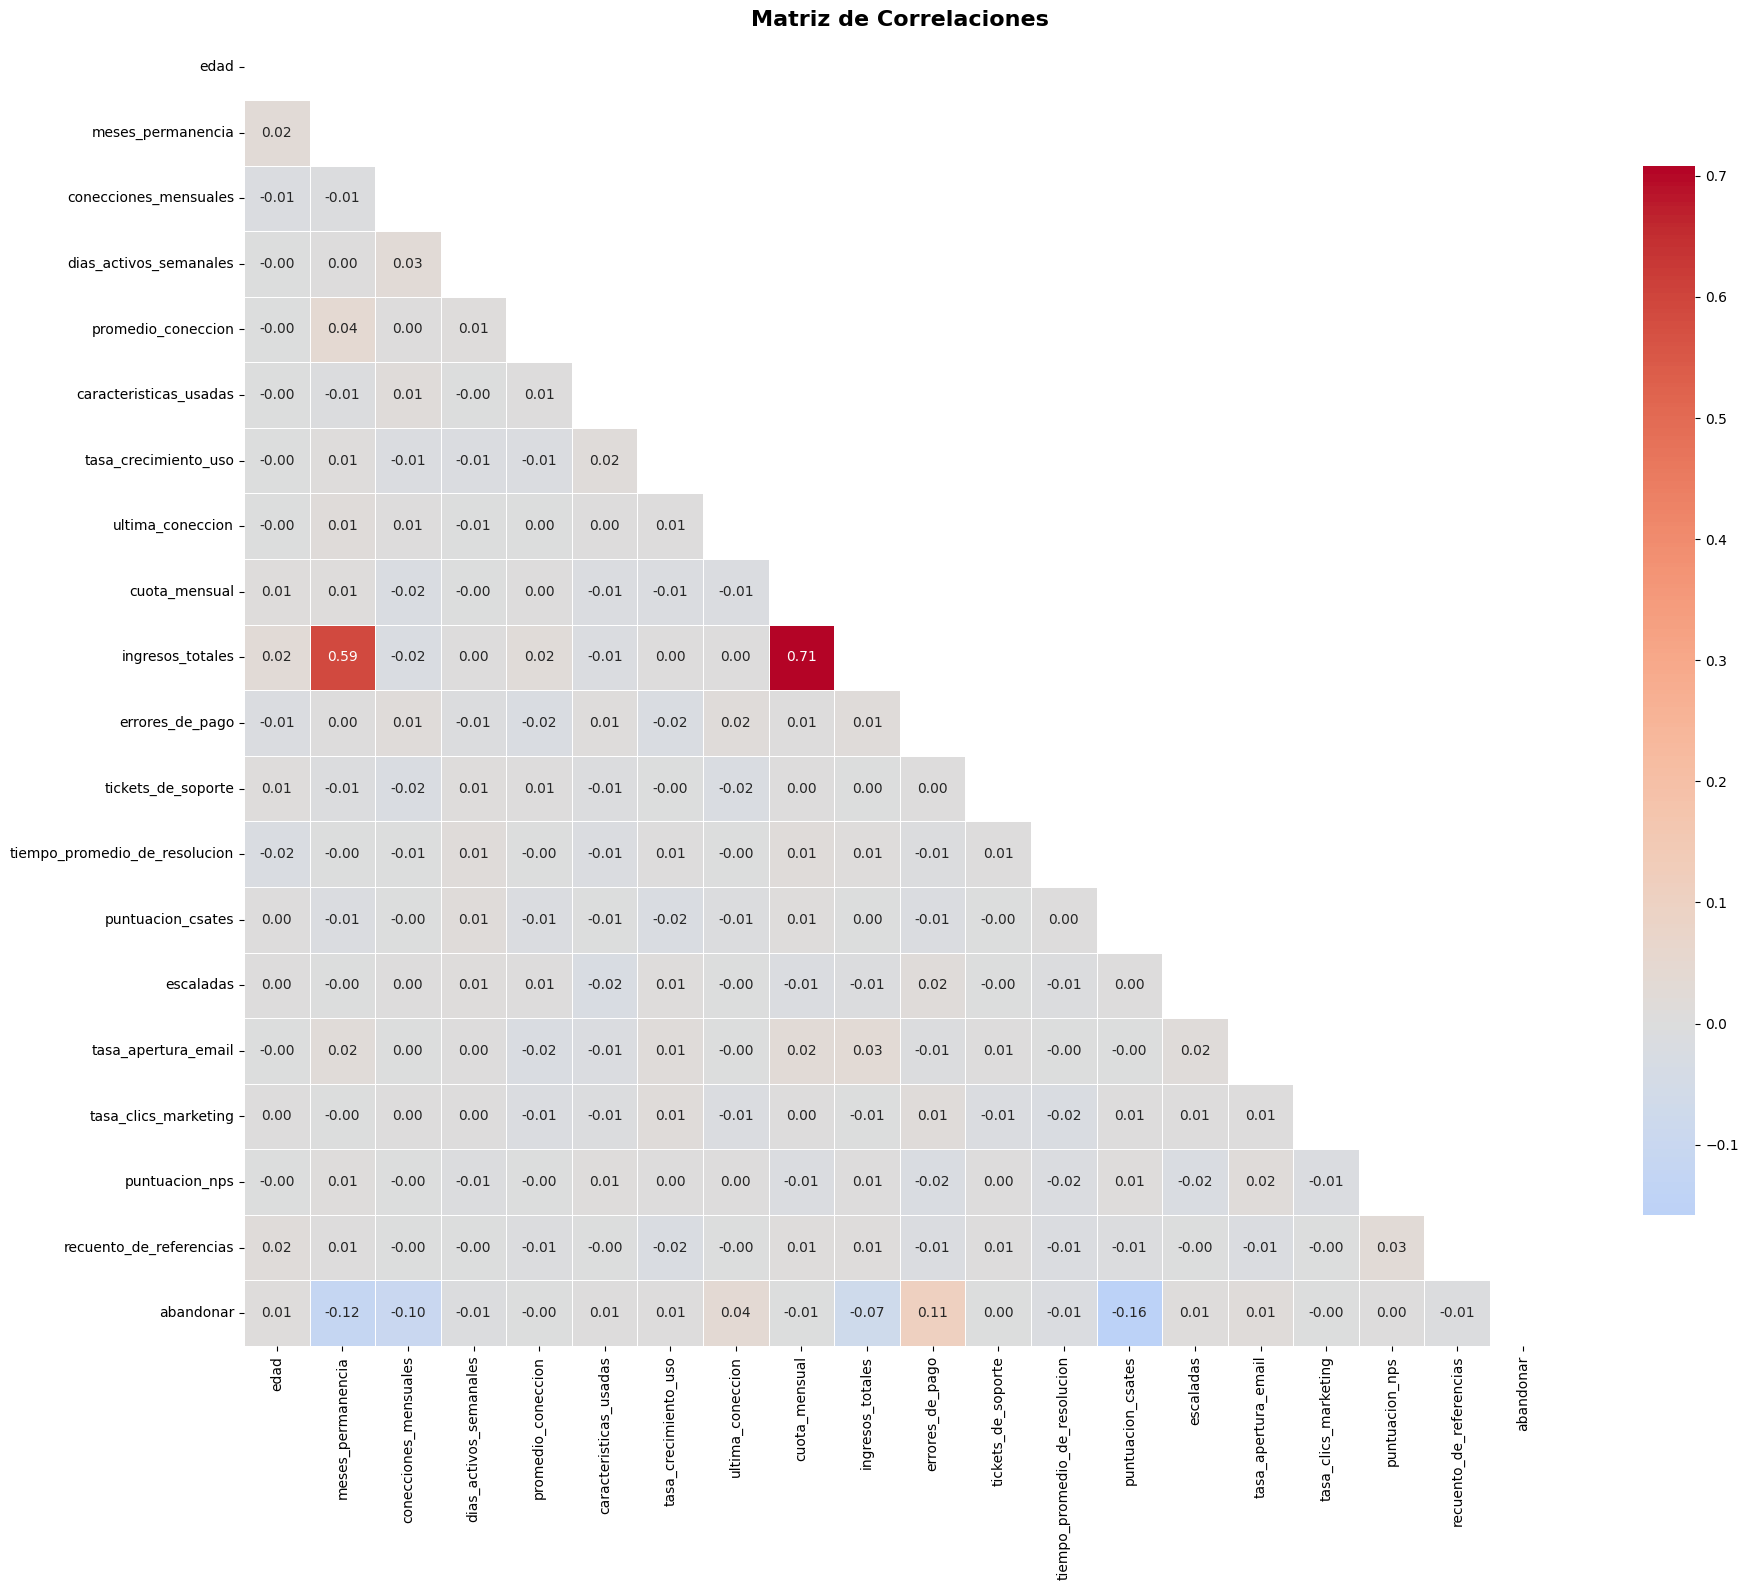

Top 10 correlaciones con Churn (absolutas):
puntuacion_csates               -0.157924
meses_permanencia               -0.117014
errores_de_pago                  0.112494
conecciones_mensuales           -0.098339
ingresos_totales                -0.070120
ultima_coneccion                 0.037250
tasa_apertura_email              0.011506
edad                             0.010155
escaladas                        0.009561
tiempo_promedio_de_resolucion   -0.009172
Name: abandonar, dtype: float64


In [29]:
# Calcular correlaciones
corr_matrix = df[num_vars + ['abandonar']].corr()

# Heatmap de correlaciones
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaciones', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top 10 correlaciones con churn
churn_corr = corr_matrix['abandonar'].sort_values(key=abs, ascending=False)
print("Top 10 correlaciones con Churn (absolutas):")
print(churn_corr[1:11])  # Excluye churn consigo mismo

En general, las correlaciones son muy pequeñas (la mayoría entre -0.15 y 0.15).
Eso significa que ninguna variable por sí sola explica el churn.

Variables con algo de relación con abandonar

meses_permanencia	-0.12	Mientras más tiempo lleva el cliente, menos probabilidad de irse.
caracteristicas_usadas	-0.10	Clientes que usan más funciones tienden a quedarse.
ingresos_totales	-0.07	Clientes que han generado más ingresos abandonan un poco menos.
puntuacion_csates (satisfacción)	-0.16	Clientes menos satisfechos abandonan más.
cuota_mensual	+0.04	Precios un poco más altos → ligero aumento del churn (muy débil).
errores_de_pago	+0.04	Problemas de pago aumentan ligeramente el riesgo.

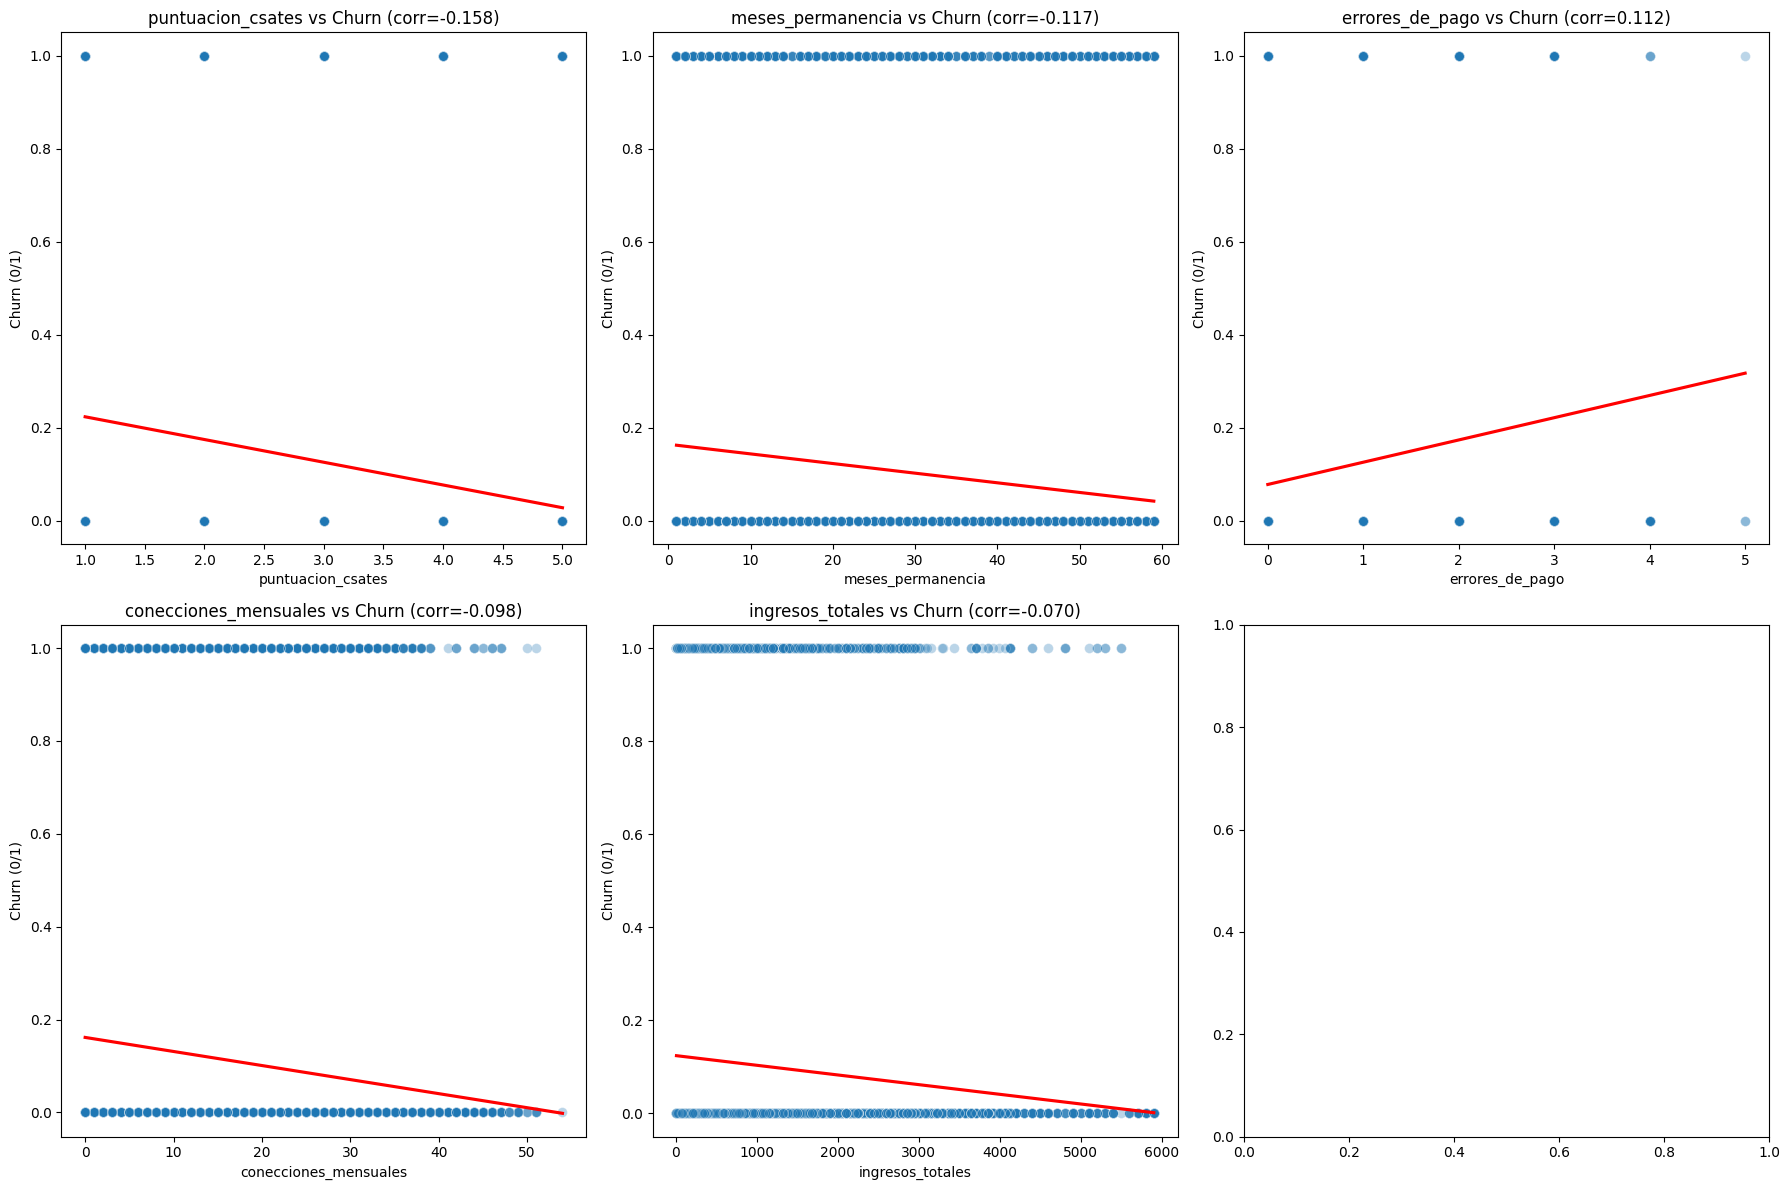

In [30]:
# Variables con mayor correlación absoluta con churn
top_correlated = churn_corr[1:6].index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(top_correlated):
    sns.scatterplot(x=var, y='abandonar', data=df, ax=axes[i],
                   alpha=0.3, s=50)

    # Agregar línea de tendencia
    sns.regplot(x=var, y='abandonar', data=df, ax=axes[i],
                scatter=False, color='red', ci=None)

    axes[i].set_title(f'{var} vs Churn (corr={corr_matrix.loc[var, "abandonar"]:.3f})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Churn (0/1)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2508767244.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2508767244.py:26: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Segmentación por Antigüedad y CSAT:
                                        tasa_churn  num_clientes  \
segmento_antiguedad segmento_csat                                  
0-6m                1-2 (Insatisfecho)       0.475           122   
                    3 (Neutral)              0.270           370   
                    4 (Satisfecho)           0.234           363   
                    5 (Muy Satisfecho)       0.266           177   
7-12m               1-2 (Insatisfecho)       0.242           178   
                    3 (Neutral)              0.053           302   
                    4 (Satisfecho)           0.057           370   
                    5 (Muy Satisfecho)       0.060           168   
13-24m              1-2 (Insatisfecho)       0.244           308   
                    3 (Neutral)              0.070           689   
                    4 (Satisfecho)           0.052           713   
                    5 (Muy Satisfecho)       0.051           277   
25-36m      

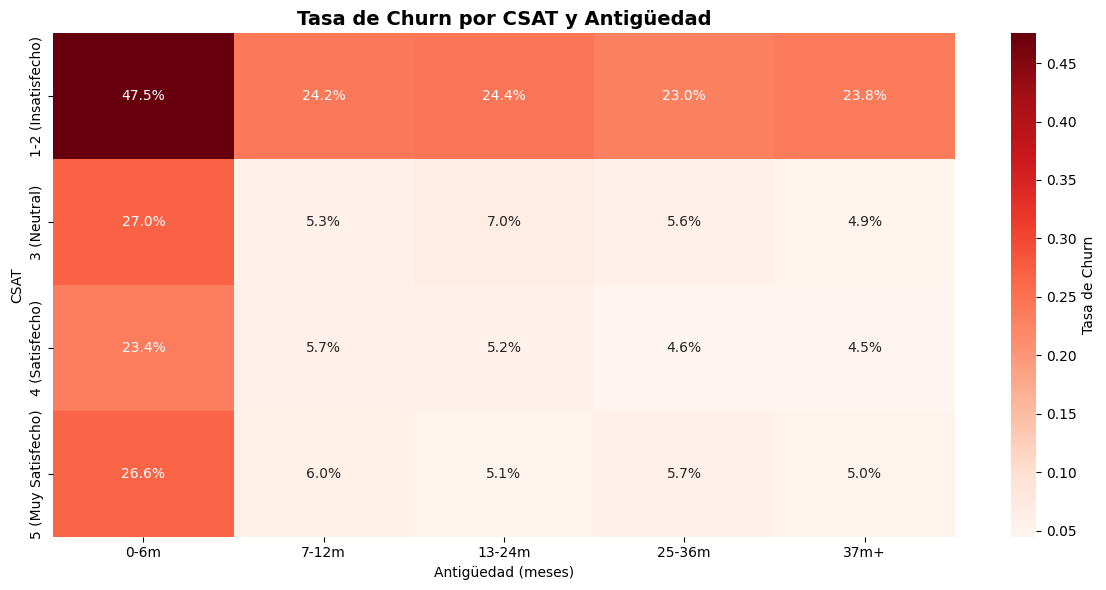

In [31]:
# Crear segmentos estratégicos
df['segmento_antiguedad'] = pd.cut(df['meses_permanencia'],
                                   bins=[0, 6, 12, 24, 36, 100],
                                   labels=['0-6m', '7-12m', '13-24m', '25-36m', '37m+'])

df['segmento_csat'] = pd.cut(df['puntuacion_csates'],
                             bins=[0, 2, 3, 4, 5],
                             labels=['1-2 (Insatisfecho)', '3 (Neutral)',
                                     '4 (Satisfecho)', '5 (Muy Satisfecho)'])

df['segmento_errores'] = pd.cut(df['errores_de_pago'],
                                bins=[-1, 0, 1, 10],
                                labels=['0 errores', '1 error', '2+ errores'])

# Calcular tasa de churn por segmentos cruzados
segmentacion = df.groupby(['segmento_antiguedad', 'segmento_csat']).agg({
    'abandonar': ['mean', 'count'],
    'ingresos_totales': 'mean'
}).round(3)

segmentacion.columns = ['tasa_churn', 'num_clientes', 'ingreso_promedio']
print("Segmentación por Antigüedad y CSAT:")
print(segmentacion)

# Heatmap de segmentación
pivot_table = df.pivot_table(index='segmento_csat',
                             columns='segmento_antiguedad',
                             values='abandonar',
                             aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1%', cmap='Reds',
            cbar_kws={'label': 'Tasa de Churn'})
plt.title('Tasa de Churn por CSAT y Antigüedad', fontsize=14, fontweight='bold')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('CSAT')
plt.tight_layout()
plt.show()